In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [5]:
data = pd.read_csv("C:/Users/rajat/Downloads/archive/creditcard.csv")

In [6]:
print(data.head(10))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [7]:
print(data.tail(10))


            Time         V1         V2        V3        V4        V5  \
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.234580 -0.008713   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284797 -1.343668  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376   
284798 -1.014307  0.427126  0.121340 -0.285670  ...  0.09

In [8]:
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
data.shape


(284807, 31)

In [10]:

data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


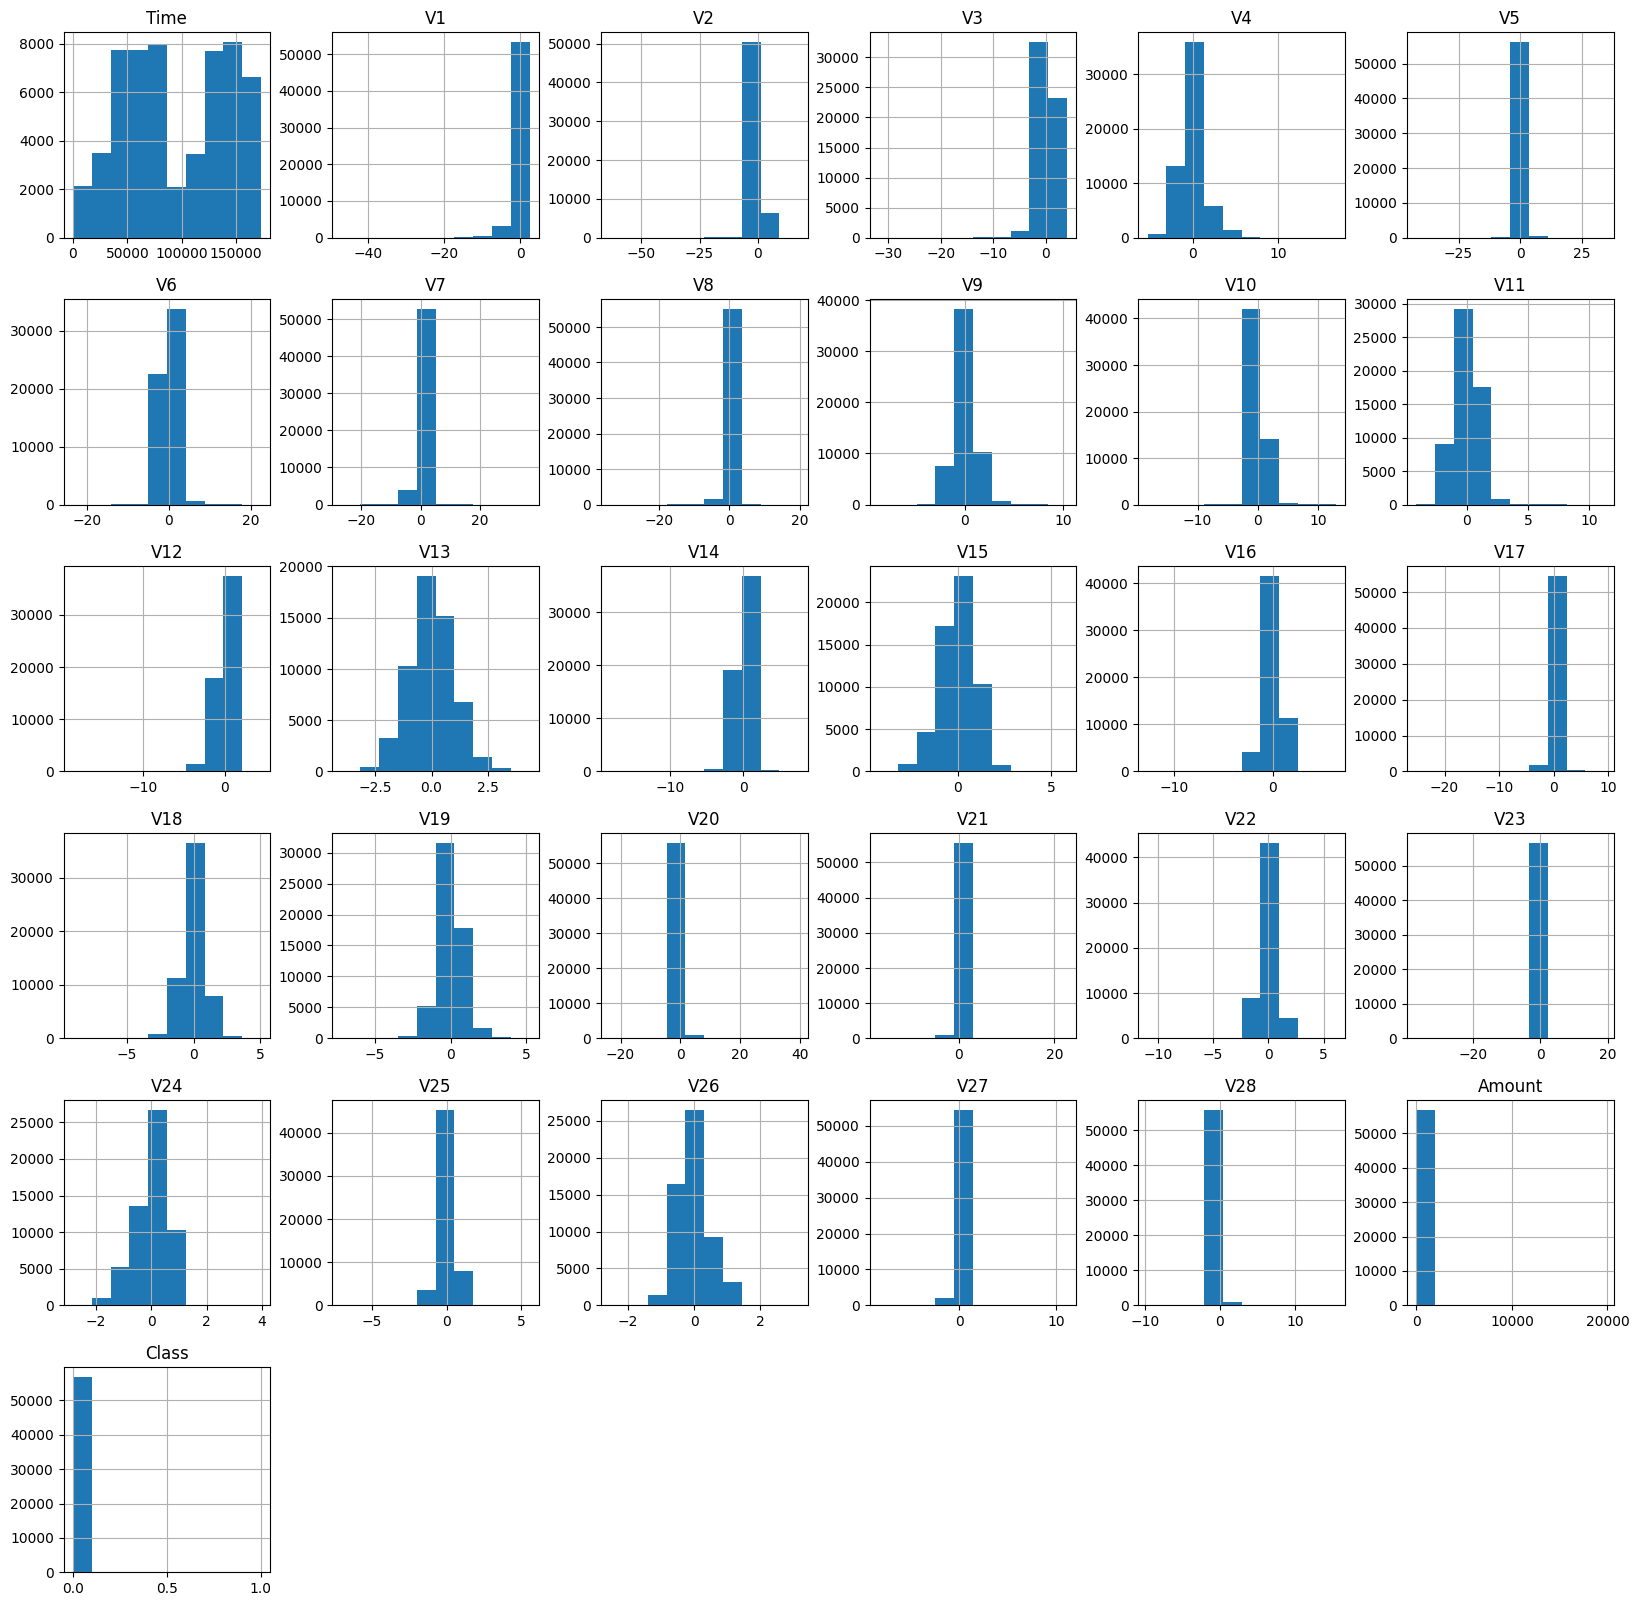

In [11]:
data.hist(figsize = (20, 20))
plt.show()

In [12]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0015296972254457222
Fraud Cases: 87
Valid Cases: 56874


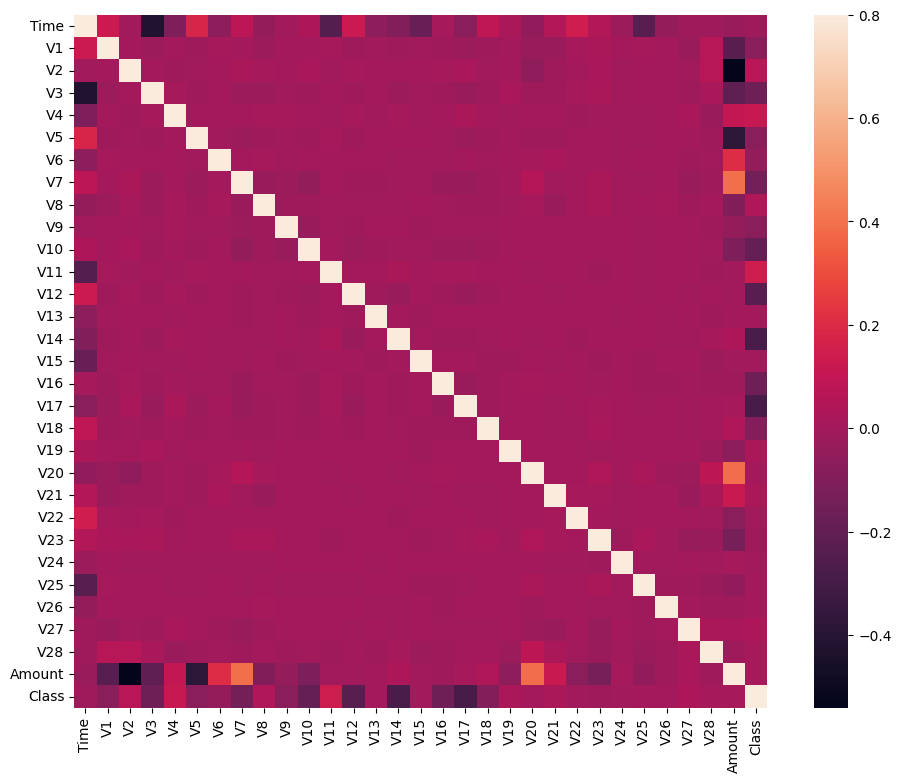

In [14]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [15]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [17]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [18]:
import warnings  # Correctly import the warnings module
import os        # Import the os module if you need to use OS functionalities

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
     # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 127
0.997770404311722
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor: 173
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



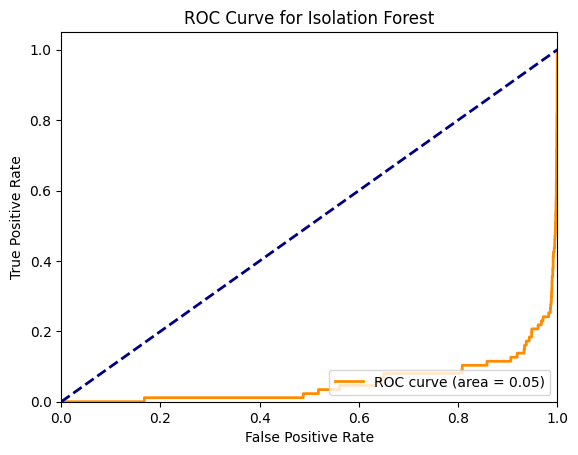

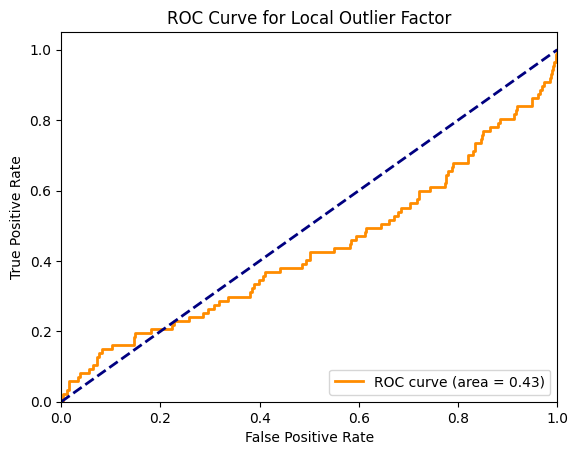

In [20]:
from sklearn.metrics import roc_curve, auc

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fitting and prediction logic remains the same
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape and calculate false positive and true positive rates
    fpr, tpr, thresholds = roc_curve(Y, scores_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {clf_name}')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
import numpy as np

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

for clf_name, clf in classifiers.items():
    if clf_name == 'Local Outlier Factor':
        continue  # Local Outlier Factor does not have a `fit` method suitable for cross-validation
    
    # Cross-validation
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print(f'{clf_name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')

Isolation Forest Cross-Validation Accuracy: 0.0011 ± 0.0003


In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='minority', random_state=state)
X_sm, Y_sm = smote.fit_resample(X, Y)

print(f'Before SMOTE: {Y.value_counts()}')
print(f'After SMOTE: {pd.Series(Y_sm).value_counts()}')

Before SMOTE: Class
0    56874
1       87
Name: count, dtype: int64
After SMOTE: Class
0    56874
1    56874
Name: count, dtype: int64


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Generate random data
X = np.random.rand(100, 20)

# Define autoencoder model
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),  # input_shape should be (X.shape[1],)
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X.shape[1], activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X, X, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Use the reconstruction error to detect fraud
reconstructions = autoencoder.predict(X)
reconstruction_error = np.mean(np.abs(reconstructions - X), axis=1)

# Set a threshold for outliers
threshold = np.percentile(reconstruction_error, 95)

# Predict fraud cases based on threshold
y_pred = (reconstruction_error > threshold).astype(int)

# Dummy Y for demonstration purposes (since original Y is missing)
# Replace this with actual Y values
Y = np.random.randint(2, size=100)

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(Y, y_pred)}')
print(classification_report(Y, y_pred))


C:\Users\rajat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 0.0833 - val_loss: 0.0771
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0823 - val_loss: 0.0771
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0836 - val_loss: 0.0771
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0835 - val_loss: 0.0771
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0820 - val_loss: 0.0771
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0821 - val_loss: 0.0770
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0824 - val_loss: 0.0770
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0824 - val_loss: 0.0769
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0827 - val_loss: 0.0768
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0810 - val_loss: 0.0767
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.46      0.96      0.62        46
      

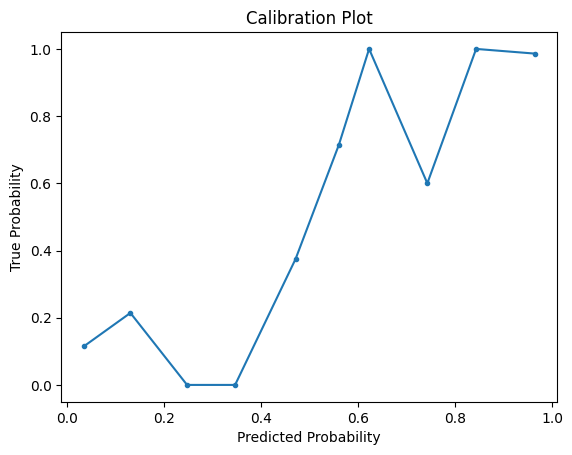

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data (replace this with your actual data)
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Using RandomForest as an example
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Calibrate classifier using isotonic calibration
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic')
calibrated_clf.fit(X_train, Y_train)
# Predict probabilities on the test set
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]

# Check calibration performance
prob_true, prob_pred = calibration_curve(Y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='.')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.show()

C:\Users\rajat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9992275552122467
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



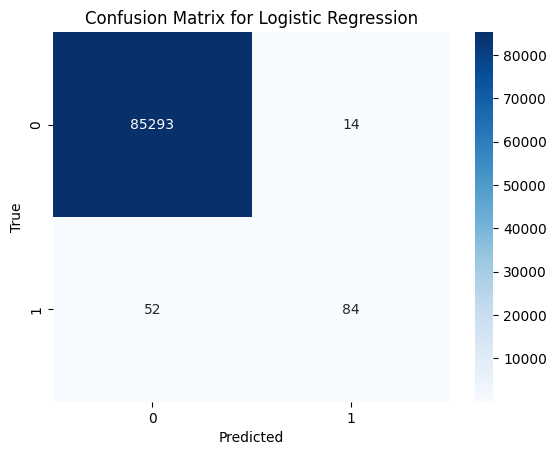

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv('C:/Users/rajat/Downloads/archive/creditcard.csv')

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

KNN Accuracy: 0.9984785178423042
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.04      0.08       136

    accuracy                           1.00     85443
   macro avg       1.00      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443



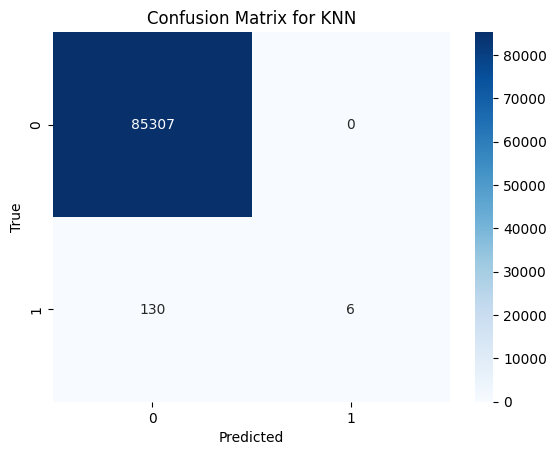

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv('C:/Users/rajat/Downloads/archive/creditcard.csv')

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
# Make predictions
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(Y_test, y_pred))
print("KNN Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Gradient Boosting Accuracy: 0.9985838512224524
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443



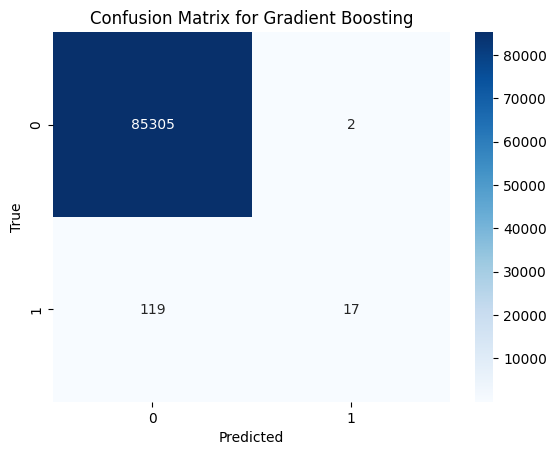

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset from the correct path
data = pd.read_csv('C:/Users/rajat/Downloads/archive/creditcard.csv')

# Define feature matrix (X) and target variable (Y)
X = data.drop(columns=['Class'])
Y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(Y_test, y_pred))
print("Gradient Boosting Classification Report:\n", classification_report(Y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()